<a href="https://colab.research.google.com/github/shielamms/Tensorflow-Notebooks/blob/main/Single_Layer_LSTM_on_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

## Prepare the dataset

The IMDB subwords 8k is already pre-tokenized, so we can retrieve the tokenizer from its metadata.

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEW4C85/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEW4C85/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEW4C85/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

## Building the model

In [4]:
import tensorflow as tf

In [5]:
embedding_dims = 64
lstm_dims = 64
dense_dims = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dims),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dims)),
    tf.keras.layers.Dense(dense_dims, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Trianing the model

In [7]:
EPOCHS = 10

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)


Epoch 1/10
98/98 [==============================] - 49s 386ms/step - loss: 0.5531 - accuracy: 0.7017 - val_loss: 0.4238 - val_accuracy: 0.8179
Epoch 2/10
98/98 [==============================] - 32s 321ms/step - loss: 0.3124 - accuracy: 0.8765 - val_loss: 0.3659 - val_accuracy: 0.8534
Epoch 3/10
98/98 [==============================] - 28s 281ms/step - loss: 0.2358 - accuracy: 0.9143 - val_loss: 0.3689 - val_accuracy: 0.8535
Epoch 4/10
98/98 [==============================] - 27s 270ms/step - loss: 0.2013 - accuracy: 0.9290 - val_loss: 0.4122 - val_accuracy: 0.8378
Epoch 5/10
98/98 [==============================] - 29s 298ms/step - loss: 0.1950 - accuracy: 0.9301 - val_loss: 0.4132 - val_accuracy: 0.8461
Epoch 6/10
98/98 [==============================] - 25s 254ms/step - loss: 0.1483 - accuracy: 0.9493 - val_loss: 0.4354 - val_accuracy: 0.8428
Epoch 7/10
98/98 [==============================] - 23s 232ms/step - loss: 0.1143 - accuracy: 0.9640 - val_loss: 0.5212 - val_accuracy: 0.8460

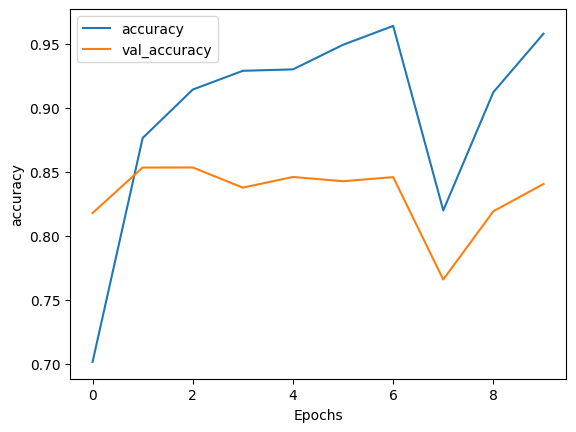

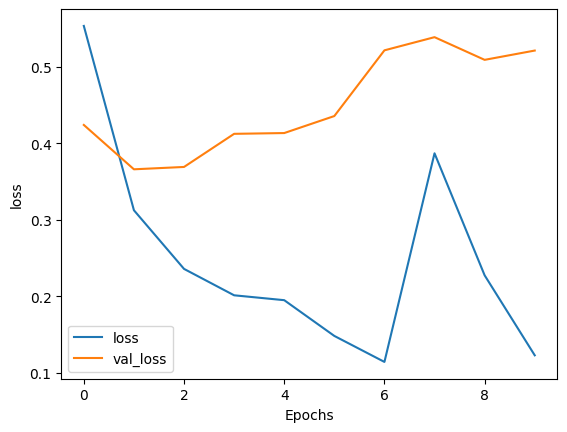

In [8]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")